## CO2 EMISSION DATASET

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# import train/test split module
from sklearn.model_selection import train_test_split
# import regression module
from sklearn.linear_model import LinearRegression

In [4]:
df1= pd.read_excel('climate-change-excel.xls')
df2= pd.read_excel('historical-data-excel.xls')

In [5]:
df1.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57481,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.967875,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [6]:
df2.head()

,Climate Change Knowledge Portal: Historical Data
0,The World Bank
1,"December 1, 2011"
2,This workbook contains historical temperature ...
3,NaN
4,This workbook contains four (4) spreadsheets:


In [7]:
df1['Series name'].value_counts()

Land area below 5m (% of land area)                                 233
Projected change in annual hot days/warm nights                     233
Renewable energy target                                             233
Population below 5m (% of total)                                    233
Population in urban agglomerations >1million (%)                    233
Annual freshwater withdrawals (% of internal resources)             233
Nationally terrestrial protected areas (% of total land area)       233
Ease of doing business (ranking 1-183; 1=best)                      233
Invest. in energy w/ private participation ($)                      233
Invest. in telecoms w/ private participation ($)                    233
Invest. in transport w/ private participation ($)                   233
Invest. in water/sanit. w/ private participation ($)                233
Public sector mgmt & institutions avg. (1-6 scale; 6=best)          233
Paved roads (% of total roads)                                  

### Data cleaning -Feature engineering

In [8]:
#replace empty with null
df1.replace(to_replace= '..', value= np.nan, inplace= True)

In [9]:
df1.isna().sum()

Country code        0
Country name        0
Series code         0
Series name         0
SCALE               0
Decimals            0
1990             8658
1991            10015
1992             9859
1993             9795
1994             9733
1995             8840
1996             9708
1997             9745
1998             9694
1999             9507
2000             8016
2001             9494
2002             9455
2003             9469
2004             9287
2005             8428
2006             9276
2007             9264
2008             8909
2009             9751
2010            11180
2011            11374
dtype: int64

In 2008, we notice that null values was lowest in recent years 

In [10]:
#select 2008 as year for the values of series to use
new_list= ['Country code','Series code', 2008]

In [11]:
df_new= df1[new_list]

In [12]:
df_new.sample(10)

,Country code,Series code,2008
9985,SYC,NY.GDP.MKTP.CD,9.209914e+08
12798,URY,SP.POP.GROW,3.047784e-01
6510,UZB,EN.CLC.PCCC,NaN
3417,NIC,EN.CLC.DRSK.XQ,NaN
7571,LBR,EN.URB.MCTY.TL.ZS,NaN
8460,GEO,IE.PPI.ENGY.CD,5.000000e+07
2053,SOM,EN.ATM.CO2E.PC,7.274603e-02
8972,LIC,IE.PPI.TRAN.CD,NaN
971,COG,EG.ELC.ACCS.ZS,NaN
13075,BRN,SP.URB.GROW,2.474395e+00


In [13]:
#group by country code
dfg= df_new.groupby('Country code')
dfg.first()

,Series code,2008
Country code,,
ABW,AG.LND.EL5M.ZS,2288.208000
ADO,AG.LND.EL5M.ZS,539.049000
AFG,AG.LND.EL5M.ZS,5.779478
AGO,AG.LND.EL5M.ZS,729.900000
ALB,AG.LND.EL5M.ZS,9.991533
...,...,...
YEM,AG.LND.EL5M.ZS,939.100000
ZAF,AG.LND.EL5M.ZS,4055.300000
ZAR,AG.LND.EL5M.ZS,771.500000


In [14]:
dfg.get_group('AGO')

,Country code,Series code,2008
3,AGO,AG.LND.EL5M.ZS,NaN
236,AGO,AG.LND.IRIG.AG.ZS,NaN
469,AGO,AG.YLD.CREL.KG,7.299000e+02
702,AGO,BX.KLT.DINV.WD.GD.ZS,1.994536e+00
935,AGO,EG.ELC.ACCS.ZS,NaN
1168,AGO,EG.USE.COMM.GD.PP.KD,1.144919e+02
1401,AGO,EG.USE.PCAP.KG.OE,6.306367e+02
1634,AGO,EN.ATM.CO2E.KT,2.437088e+04
1867,AGO,EN.ATM.CO2E.PC,1.351088e+00
2100,AGO,EN.ATM.CO2E.PP.GD.KD,2.452897e+02


In [15]:
# create a pivot table with series as features
dfn_n= df_new.pivot(index='Country code', columns='Series code', values=2008).reset_index()

In [16]:
dfn= dfn_n.copy()

In [17]:
dfn.sample(10)

Series code,Country code,AG.LND.EL5M.ZS,AG.LND.IRIG.AG.ZS,AG.YLD.CREL.KG,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EG.USE.COMM.GD.PP.KD,EG.USE.PCAP.KG.OE,EN.ATM.CO2E.KT,EN.ATM.CO2E.PC,...,SH.MED.NUMW.P3,SH.MED.PHYS.ZS,SH.MLR.INCD,SH.STA.ACSN,SH.STA.MALN.ZS,SI.POV.DDAY,SP.POP.GROW,SP.POP.TOTL,SP.URB.GROW,SP.URB.TOTL
232,ZWE,NaN,NaN,309.4,1.168478,NaN,NaN,763.436949,9075.825,0.728892,...,NaN,NaN,7480.0,44.0,NaN,NaN,-0.238257,12451543.0,1.055562,4.649406e+06
11,AUT,NaN,NaN,6809.8,1.592155,NaN,110.976015,4016.596045,67725.823,8.123597,...,7.84,NaN,NaN,100.0,NaN,NaN,0.434411,8336926.0,0.762525,5.599080e+06
18,BGR,NaN,NaN,4100.8,19.255447,NaN,216.091510,2594.208879,50538.594,6.629408,...,4.72,3.635,NaN,100.0,NaN,NaN,-0.475937,7623395.0,-0.053103,5.420234e+06
131,MDA,NaN,9.189843,3202.6,11.771971,NaN,318.684345,882.205211,4774.434,1.337336,...,NaN,NaN,NaN,79.0,NaN,1.86,-0.190205,3570107.0,-0.858466,1.490877e+06
161,NZL,NaN,NaN,7379.7,4.346775,NaN,158.581452,4042.530863,33094.675,7.752507,...,NaN,NaN,NaN,NaN,NaN,NaN,0.955616,4268900.0,1.094345,3.695160e+06
105,KGZ,NaN,9.303626,2380.2,7.334538,NaN,253.763198,518.335323,6208.231,1.176269,...,NaN,NaN,0.0,93.0,NaN,NaN,0.819965,5277900.0,1.261955,1.914822e+06
221,VEN,NaN,NaN,3826.4,0.112493,NaN,200.488541,2357.008126,169532.744,6.068829,...,NaN,NaN,263.0,NaN,NaN,NaN,1.631275,27935000.0,1.996278,2.606894e+07
150,MYT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.115200,191805.0,NaN,NaN
205,TJK,NaN,15.020097,2140.2,7.280816,NaN,209.321451,372.746217,3146.286,0.470197,...,NaN,NaN,9.0,94.0,NaN,NaN,1.308548,6691416.0,1.384162,1.770549e+06
167,PLW,NaN,NaN,NaN,1.033689,NaN,NaN,NaN,212.686,10.514435,...,NaN,NaN,NaN,NaN,NaN,NaN,0.545285,20228.0,1.947060,1.627545e+04


If we drop nan values from the whole data, there will not be any data left in the dataset for our analysis, so we use a threshhold of 180 in other foe only columns with less than 180 non nan values to be dropped. this will leave a considerable numbner of feautures to work with.

In [18]:
dfn.dropna(axis= 1, thresh= 180, inplace= True)

In [19]:
dfn.shape

(233, 16)

In [20]:
#now we can drop all the remaining null values as the values 
dfn.dropna(inplace= True)

In [21]:
dfn.shape

(156, 16)

There are 156 observations now to work with which is considerably efficient

In [22]:
#rename the series code and country code column make working with thwem easy
dfn.rename(columns= {'Series code': 'Series_code', 'Country code': 'Country_code'}, inplace= True)

In [23]:
#set country_code as the index column
dfn.set_index('Country_code', inplace= True)

In [24]:
#test index
dfn.index

Index(['AFG', 'AGO', 'ALB', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL',
       ...
       'UMC', 'URY', 'USA', 'UZB', 'VNM', 'VUT', 'YEM', 'ZAF', 'ZAR', 'ZMB'],
      dtype='object', name='Country_code', length=156)

In [25]:
#remove the columns title on top of Country_code
dfn.columns.name = None
#remove dots in column names
dfn.columns= dfn.columns.str.replace('.', '', regex= False)

In [26]:
dfn.sample(5)

,AGYLDCRELKG,BXKLTDINVWDGDZS,ENATMCO2EKT,ENATMCO2EPC,ENATMCO2EPPGDKD,ERLNDPTLDZS,NYGDPMKTPCD,NYGNPPCAPCD,SHDYNMORT,SHH2OSAFEZS,SHSTAACSN,SPPOPGROW,SPPOPTOTL,SPURBGROW,SPURBTOTL
Country_code,,,,,,,,,,,,,,,
ETH,1421.700000,0.407386,7.106646e+03,0.089452,109.928234,18.398678,2.664246e+10,290.000000,111.900000,38.000000,12.000000,2.199032,7.944642e+07,3.979494,1.350589e+07
PRT,3597.800000,1.858172,5.631045e+04,5.301098,241.373154,5.919456,2.519253e+11,21520.000000,4.100000,99.000000,100.000000,0.132619,1.062241e+07,1.180811,6.316087e+06
UMC,3781.478191,3.701687,1.285997e+07,5.316883,659.426458,13.633126,1.329496e+13,4880.429704,22.103724,91.504888,67.829954,0.691105,2.418704e+09,1.928534,1.356445e+09
SRB,4580.000000,6.133019,4.993354e+04,6.793475,663.166657,5.957833,4.885661e+10,5520.000000,7.800000,99.000000,92.000000,-0.425719,7.350221e+06,-0.079232,3.825055e+06
TUN,1442.400000,6.459804,2.501261e+04,2.421614,329.169359,1.296377,4.084482e+10,3540.000000,18.100000,94.000000,85.000000,1.010031,1.032890e+07,1.613351,6.868718e+06


In [27]:
#get series code and the corresponding name
list1=list(df1['Series name'].value_counts().index)
list3= list(df1['Series code'].value_counts().index)
df_series= pd.DataFrame(list(zip(list1, list3)), columns= ['Series_name', 'Series_code'])
df_series['Series_code']= df_series['Series_code'].str.replace('.', '', regex=False)
df_series

,Series_name,Series_code
0,Land area below 5m (% of land area),AGLNDEL5MZS
1,Projected change in annual hot days/warm nights,ENCLCPCHW
2,Renewable energy target,ENCLCRNET
3,Population below 5m (% of total),ENPOPEL5MZS
4,Population in urban agglomerations >1million (%),ENURBMCTYTLZS
5,Annual freshwater withdrawals (% of internal r...,ERH2OFWTLZS
6,Nationally terrestrial protected areas (% of t...,ERLNDPTLDZS
7,Ease of doing business (ranking 1-183; 1=best),ICBUSEASEXQ
8,Invest. in energy w/ private participation ($),IEPPIENGYCD
9,Invest. in telecoms w/ private participation ($),IEPPITELECD


In [28]:
#check the series name that appears in our list of feautures
dfn.columns

Index(['AGYLDCRELKG', 'BXKLTDINVWDGDZS', 'ENATMCO2EKT', 'ENATMCO2EPC',
       'ENATMCO2EPPGDKD', 'ERLNDPTLDZS', 'NYGDPMKTPCD', 'NYGNPPCAPCD',
       'SHDYNMORT', 'SHH2OSAFEZS', 'SHSTAACSN', 'SPPOPGROW', 'SPPOPTOTL',
       'SPURBGROW', 'SPURBTOTL'],
      dtype='object')

In [310]:
# # get the list of features names
# feature_list= []
# list2= list(dfn.columns)
# for names in df_series.Series_code:
#     if names in list2:
#         list1= df_series[df_series['Series_code']==names]['Series_name'].values
#         feature_list.append(list1)
# feature_list

In [29]:
# match columns represenred to the corresponding series codes
list4= dfn.columns
used_series= df_series.loc[df_series['Series_code'].isin(list4)]
used_series

,Series_name,Series_code
6,Nationally terrestrial protected areas (% of t...,ERLNDPTLDZS
14,GDP ($),NYGDPMKTPCD
15,GNI per capita (Atlas $),NYGNPPCAPCD
18,"Under-five mortality rate (per 1,000)",SHDYNMORT
19,Access to improved water source (% of total pop.),SHH2OSAFEZS
23,Access to improved sanitation (% of total pop.),SHSTAACSN
26,Population,SPPOPTOTL
31,Cereal yield (kg per hectare),AGYLDCRELKG
32,"Foreign direct investment, net inflows (% of GDP)",BXKLTDINVWDGDZS
36,"CO2 emissions, total (KtCO2)",ENATMCO2EKT


In [291]:
used_series.to_csv('used feautures and codes.csv')

In [ ]:
## #rename the columns
# dfn.rename(columns= {'ER.LND.PTLD.ZS': 'Terst_prot_Areas', 'NY.GDP.MKTP.CD': 'GDP', 'NY.GNP.PCAP.CD': 'GNI_per_capita', 'SH.DYN.MORT':'mort_rate<5',
#                     ''} )

In [30]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, AFG to ZMB
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGYLDCRELKG      156 non-null    float64
 1   BXKLTDINVWDGDZS  156 non-null    float64
 2   ENATMCO2EKT      156 non-null    float64
 3   ENATMCO2EPC      156 non-null    float64
 4   ENATMCO2EPPGDKD  156 non-null    float64
 5   ERLNDPTLDZS      156 non-null    float64
 6   NYGDPMKTPCD      156 non-null    float64
 7   NYGNPPCAPCD      156 non-null    float64
 8   SHDYNMORT        156 non-null    float64
 9   SHH2OSAFEZS      156 non-null    float64
 10  SHSTAACSN        156 non-null    float64
 11  SPPOPGROW        156 non-null    float64
 12  SPPOPTOTL        156 non-null    float64
 13  SPURBGROW        156 non-null    float64
 14  SPURBTOTL        156 non-null    float64
dtypes: float64(15)
memory usage: 19.5+ KB


In [31]:
dfn.describe()

,AGYLDCRELKG,BXKLTDINVWDGDZS,ENATMCO2EKT,ENATMCO2EPC,ENATMCO2EPPGDKD,ERLNDPTLDZS,NYGDPMKTPCD,NYGNPPCAPCD,SHDYNMORT,SHH2OSAFEZS,SHSTAACSN,SPPOPGROW,SPPOPTOTL,SPURBGROW,SPURBTOTL
count,156.000000,156.000000,1.560000e+02,156.000000,156.000000,156.000000,1.560000e+02,156.000000,156.000000,156.000000,156.000000,156.000000,1.560000e+02,156.000000,1.560000e+02
mean,3043.313303,6.621683,7.076301e+05,3.963729,370.827476,11.765492,1.163353e+12,10294.927607,50.154668,84.916497,68.459316,1.415227,1.875595e+08,2.276483,8.923924e+07
std,1953.828749,14.915992,2.564961e+06,5.012191,287.962798,8.563269,4.434507e+12,16592.226763,49.611381,16.795287,29.994380,1.038548,6.863840e+08,1.561095,3.173473e+08
min,252.200000,-7.620741,9.167500e+01,0.022620,28.479977,0.000000,4.979189e+08,140.000000,3.200000,38.000000,9.000000,-1.036064,2.280410e+05,-0.858466,5.646295e+04
25%,1417.725000,2.107063,3.063778e+03,0.458189,187.344547,4.957188,9.287933e+09,992.337163,9.975000,75.750000,45.329245,0.660034,4.415187e+06,1.079492,1.901015e+06
50%,2738.200000,3.688512,1.983664e+04,1.968715,284.677423,10.718140,3.640283e+10,3275.000000,27.293629,91.752444,78.500000,1.362991,1.068187e+07,2.238805,5.609296e+06
75%,4115.250000,7.136832,1.363326e+05,5.521374,483.142165,16.698648,2.881282e+11,9317.500000,79.375000,99.000000,96.000000,2.117474,4.295220e+07,3.317291,2.290485e+07
max,8885.700000,171.663958,1.682243e+07,37.393460,1862.718291,40.471816,4.409143e+13,84850.000000,185.400000,100.000000,100.000000,5.081578,5.574219e+09,6.218714,2.491564e+09


### EDA

array([[<AxesSubplot: title={'center': 'AGYLDCRELKG'}>,
        <AxesSubplot: title={'center': 'BXKLTDINVWDGDZS'}>,
        <AxesSubplot: title={'center': 'ENATMCO2EKT'}>,
        <AxesSubplot: title={'center': 'ENATMCO2EPC'}>],
       [<AxesSubplot: title={'center': 'ENATMCO2EPPGDKD'}>,
        <AxesSubplot: title={'center': 'ERLNDPTLDZS'}>,
        <AxesSubplot: title={'center': 'NYGDPMKTPCD'}>,
        <AxesSubplot: title={'center': 'NYGNPPCAPCD'}>],
       [<AxesSubplot: title={'center': 'SHDYNMORT'}>,
        <AxesSubplot: title={'center': 'SHH2OSAFEZS'}>,
        <AxesSubplot: title={'center': 'SHSTAACSN'}>,
        <AxesSubplot: title={'center': 'SPPOPGROW'}>],
       [<AxesSubplot: title={'center': 'SPPOPTOTL'}>,
        <AxesSubplot: title={'center': 'SPURBGROW'}>,
        <AxesSubplot: title={'center': 'SPURBTOTL'}>, <AxesSubplot: >]],
      dtype=object)

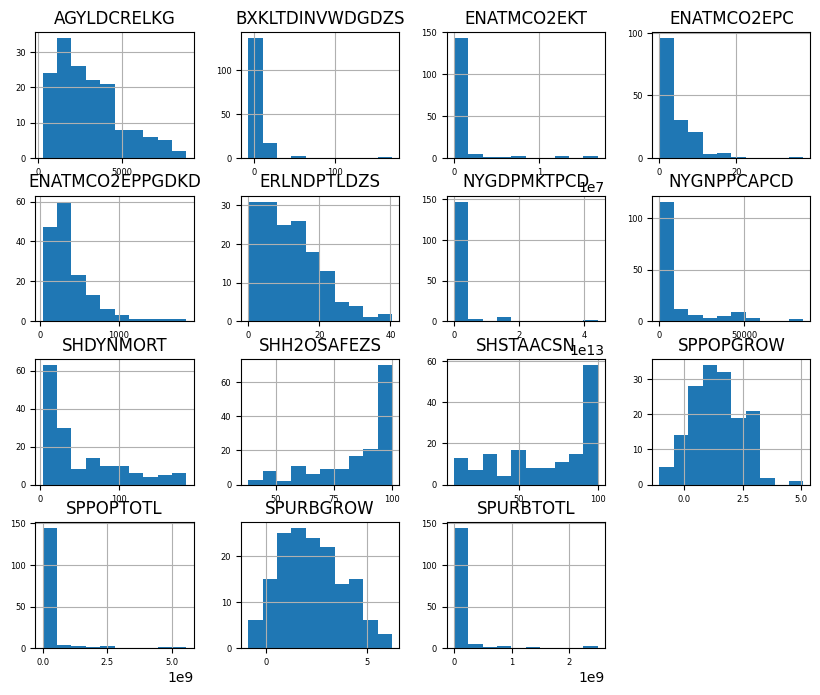

In [314]:
dfn.hist(
    figsize=(10, 8),
    xlabelsize= 6,
    ylabelsize=6)

#### check for outliers with kurtois

In [57]:
dfn.kurtosis()

AG.YLD.CREL.KG           0.082992
BX.KLT.DINV.WD.GD.ZS    98.225623
EN.ATM.CO2E.KT          25.394811
EN.ATM.CO2E.PC          13.018884
EN.ATM.CO2E.PP.GD.KD     6.636450
ER.LND.PTLD.ZS           0.400106
NY.GDP.MKTP.CD          59.331209
NY.GNP.PCAP.CD           5.045281
SH.DYN.MORT              0.238152
SH.H2O.SAFE.ZS           0.069737
SH.STA.ACSN             -1.137706
SP.POP.GROW             -0.068097
SP.POP.TOTL             38.128759
SP.URB.GROW             -0.601679
SP.URB.TOTL             36.778485
dtype: float64

Shows there are outliers in some of the features

#### check for multicolinearity

In [32]:
dfn.corr()

,AGYLDCRELKG,BXKLTDINVWDGDZS,ENATMCO2EKT,ENATMCO2EPC,ENATMCO2EPPGDKD,ERLNDPTLDZS,NYGDPMKTPCD,NYGNPPCAPCD,SHDYNMORT,SHH2OSAFEZS,SHSTAACSN,SPPOPGROW,SPPOPTOTL,SPURBGROW,SPURBTOTL
AGYLDCRELKG,1.000000,0.091159,0.147913,0.458316,0.089132,0.109240,0.219772,0.614378,-0.614724,0.568400,0.620691,-0.581940,0.058455,-0.577762,0.085823
BXKLTDINVWDGDZS,0.091159,1.000000,-0.057682,0.246594,0.010611,0.038183,-0.059759,0.270825,-0.083291,0.087489,0.088976,0.036174,-0.055511,-0.048422,-0.057659
ENATMCO2EKT,0.147913,-0.057682,1.000000,0.121558,0.205136,0.038487,0.820771,0.039439,-0.085358,0.099713,0.014409,-0.132816,0.897483,-0.066289,0.945162
ENATMCO2EPC,0.458316,0.246594,0.121558,1.000000,0.479008,0.127875,0.215109,0.650431,-0.522556,0.525066,0.587506,-0.459159,-0.010475,-0.465080,0.025972
ENATMCO2EPPGDKD,0.089132,0.010611,0.205136,0.479008,1.000000,-0.133735,0.085632,-0.070326,-0.289167,0.293144,0.300627,-0.302900,0.188108,-0.290334,0.185987
ERLNDPTLDZS,0.109240,0.038183,0.038487,0.127875,-0.133735,1.000000,0.069330,0.142352,-0.085834,0.099871,0.012106,0.009604,0.009568,0.042901,0.027494
NYGDPMKTPCD,0.219772,-0.059759,0.820771,0.215109,0.085632,0.069330,1.000000,0.209014,-0.139637,0.147708,0.119728,-0.143729,0.571990,-0.127404,0.660229
NYGNPPCAPCD,0.614378,0.270825,0.039439,0.650431,-0.070326,0.142352,0.209014,1.000000,-0.487585,0.478078,0.543541,-0.326433,-0.074183,-0.424019,-0.039721
SHDYNMORT,-0.614724,-0.083291,-0.085358,-0.522556,-0.289167,-0.085834,-0.139637,-0.487585,1.000000,-0.826926,-0.833923,0.711361,0.013066,0.725503,-0.022588
SHH2OSAFEZS,0.568400,0.087489,0.099713,0.525066,0.293144,0.099871,0.147708,0.478078,-0.826926,1.000000,0.820209,-0.680188,0.022150,-0.704522,0.051509


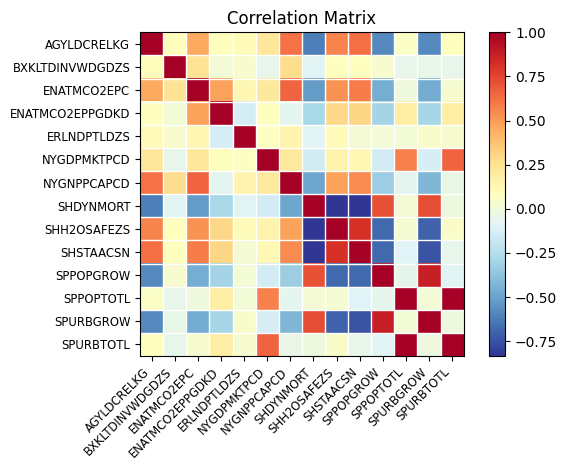

In [317]:
# We only compare the predictor variables, and thus drop the target total co2 emmision 'EN.ATM.CO2E.KT' column.
from statsmodels.graphics.correlation import plot_corr
corr = dfn.drop('ENATMCO2EKT', axis='columns').corr()
fig=plot_corr(corr,xnames=corr.columns)

The correlation shows that series 'SYNDYNMORT' is strongly negatively correlated wih SHH20SAFEZS and SHSTAACSN which are correletated with one another as expected. Also, series SP.POP.TOTL is stongly positively correlated with SPURBTOTL as expected. To correct for multicolinearity, we will be removing two from the first group of three and one from the latter group of two. SYNDYNMORT and SHSTAACSN will be removed because SHH2OSAFEZS is the more correlated with the target variable ENATMCO2EKT. SPURBTOTL being more correlated with our target variable will also be used in the model.

In [33]:
#removing the correlated feautures and updating used_series
dfn.drop(['SHDYNMORT','SHH2OSAFEZS','SPPOPTOTL'], axis= 1, inplace= True)

In [34]:
dfn.columns

Index(['AGYLDCRELKG', 'BXKLTDINVWDGDZS', 'ENATMCO2EKT', 'ENATMCO2EPC',
       'ENATMCO2EPPGDKD', 'ERLNDPTLDZS', 'NYGDPMKTPCD', 'NYGNPPCAPCD',
       'SHSTAACSN', 'SPPOPGROW', 'SPURBGROW', 'SPURBTOTL'],
      dtype='object')

In [35]:
#update used_series
list5= dfn.columns
used_series= df_series.loc[df_series['Series_code'].isin(list5)]
used_series

,Series_name,Series_code
6,Nationally terrestrial protected areas (% of t...,ERLNDPTLDZS
14,GDP ($),NYGDPMKTPCD
15,GNI per capita (Atlas $),NYGNPPCAPCD
23,Access to improved sanitation (% of total pop.),SHSTAACSN
31,Cereal yield (kg per hectare),AGYLDCRELKG
32,"Foreign direct investment, net inflows (% of GDP)",BXKLTDINVWDGDZS
36,"CO2 emissions, total (KtCO2)",ENATMCO2EKT
37,CO2 emissions per capita (metric tons),ENATMCO2EPC
38,"CO2 emissions per units of GDP (kg/$1,000 of 2...",ENATMCO2EPPGDKD
55,Urban population,SPURBTOTL


In [459]:
used_series.to_csv('features after corr.csv')

#### Check for linearity

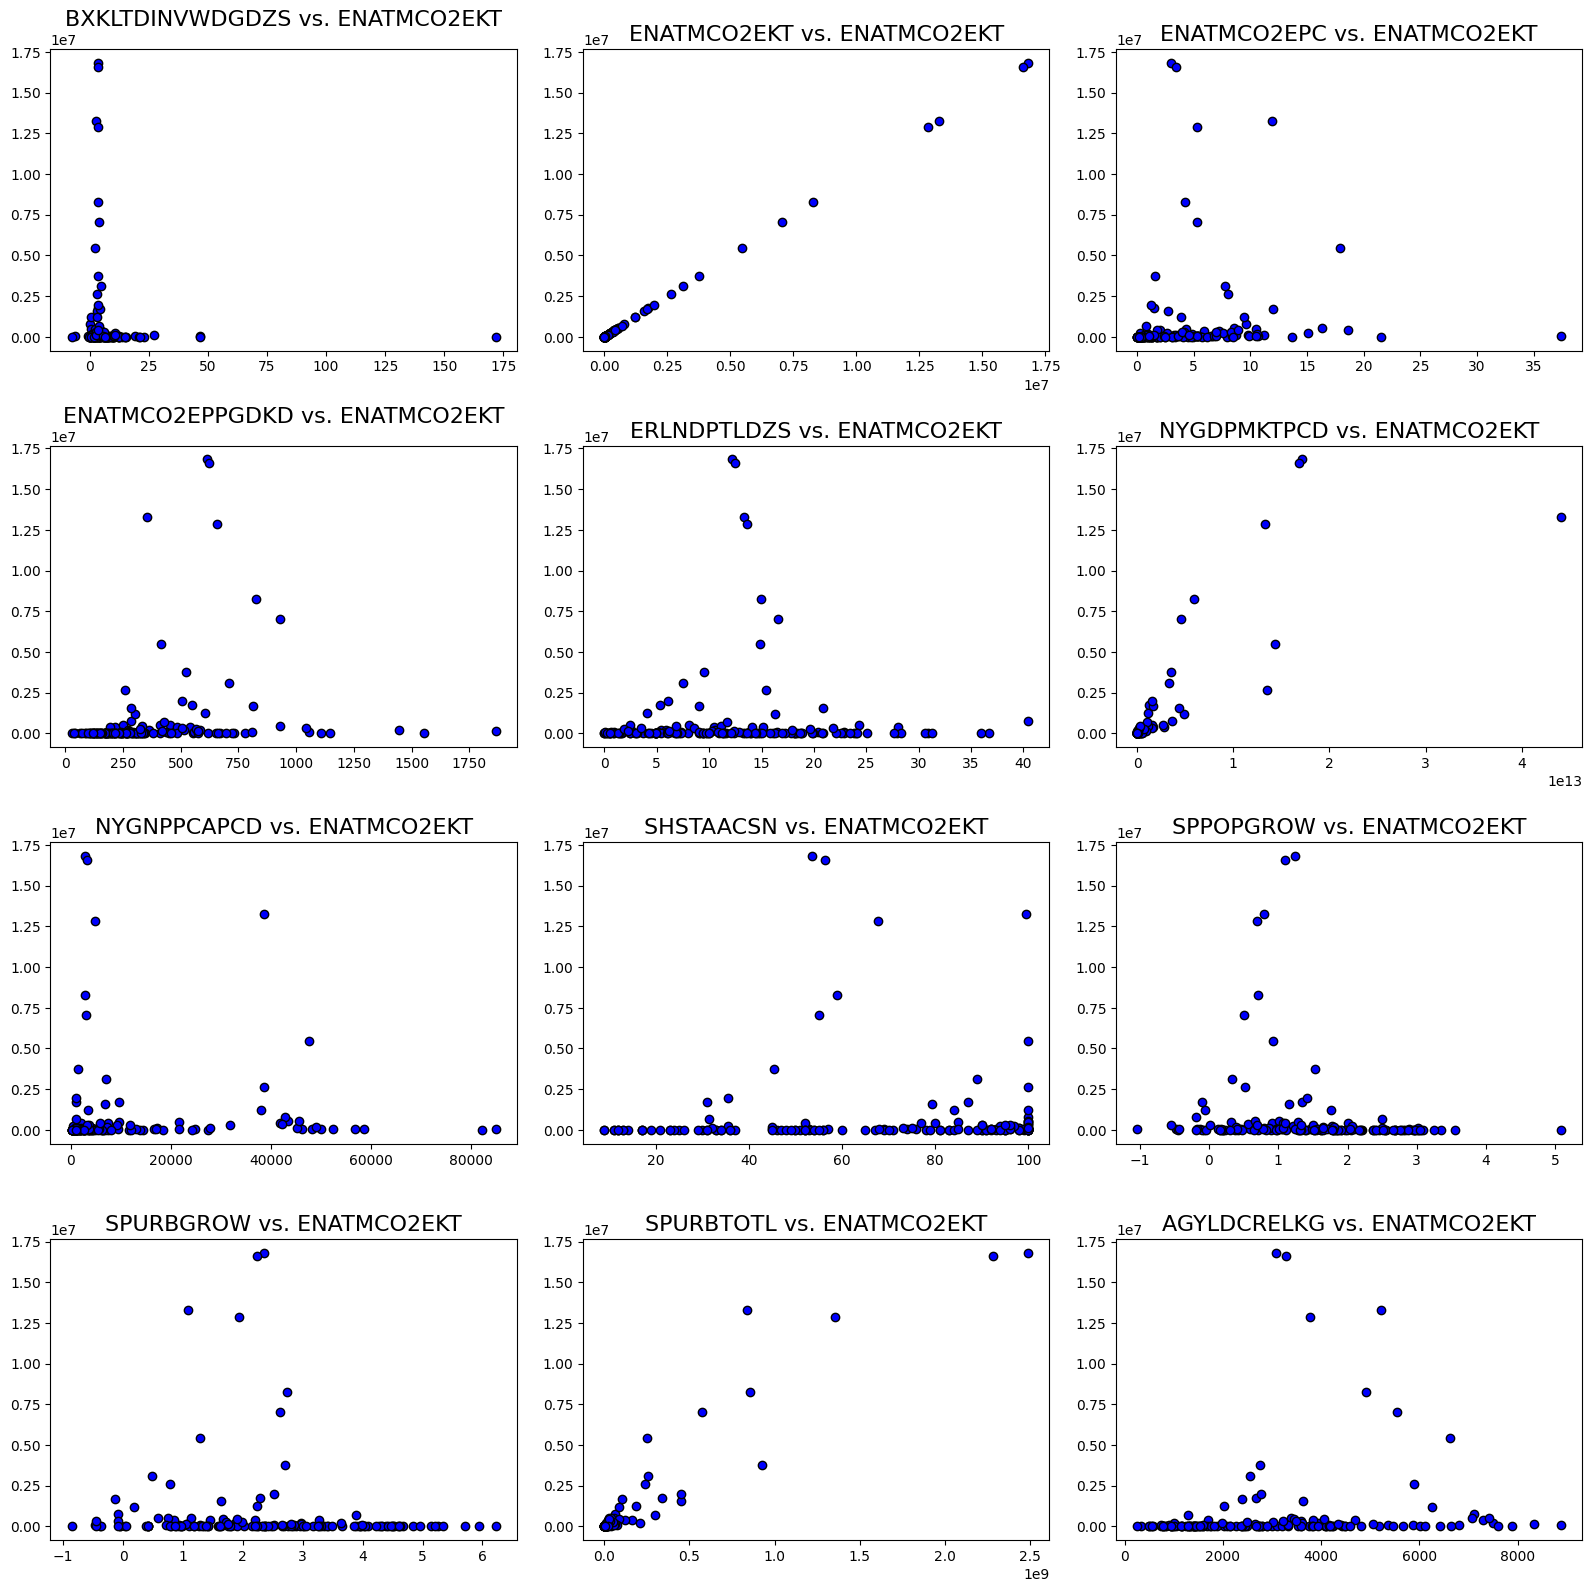

In [460]:
fig, axs = plt.subplots(4,3, figsize=(16,16),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(dfn.columns):
    axs[index-1].set_title("{} vs. ENATMCO2EKT".format(column),fontsize=16)
    axs[index-1].scatter(x=dfn[column],y=dfn['ENATMCO2EKT'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

The charts shows evidence of linearity between the features and our target feature. There are however evidence of outliers in the series, especially Foreign direct investment, net inflows (% of GDP) with series code BXKLTDINVWDGDZS. This outliers can affect the level of linearity observered and inturn affect the model performance. We will be using models that are not sensitive to outliers to correct for this.

### Modelling

We are going to be using the statsmodel package to fit our linear regression

In [36]:
import statsmodels.formula.api as sm

In [40]:
#define X and y
tar= dfn.columns[2]
dep= dfn.drop('ENATMCO2EKT', axis=1).columns

In [41]:
formula_str = tar+' ~ '+'+'.join(dep); formula_str

'ENATMCO2EKT ~ AGYLDCRELKG+BXKLTDINVWDGDZS+ENATMCO2EPC+ENATMCO2EPPGDKD+ERLNDPTLDZS+NYGDPMKTPCD+NYGNPPCAPCD+SHSTAACSN+SPPOPGROW+SPURBGROW+SPURBTOTL'

In [42]:
model=sm.ols(formula=formula_str, data=dfn)

In [43]:
fitted = model.fit()

In [44]:
#print model summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:            ENATMCO2EKT   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     358.9
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           9.73e-99
Time:                        10:49:32   Log-Likelihood:                -2262.0
No. Observations:                 156   AIC:                             4548.
Df Residuals:                     144   BIC:                             4585.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.812e+05   2.44e+05     

### Checking for independence

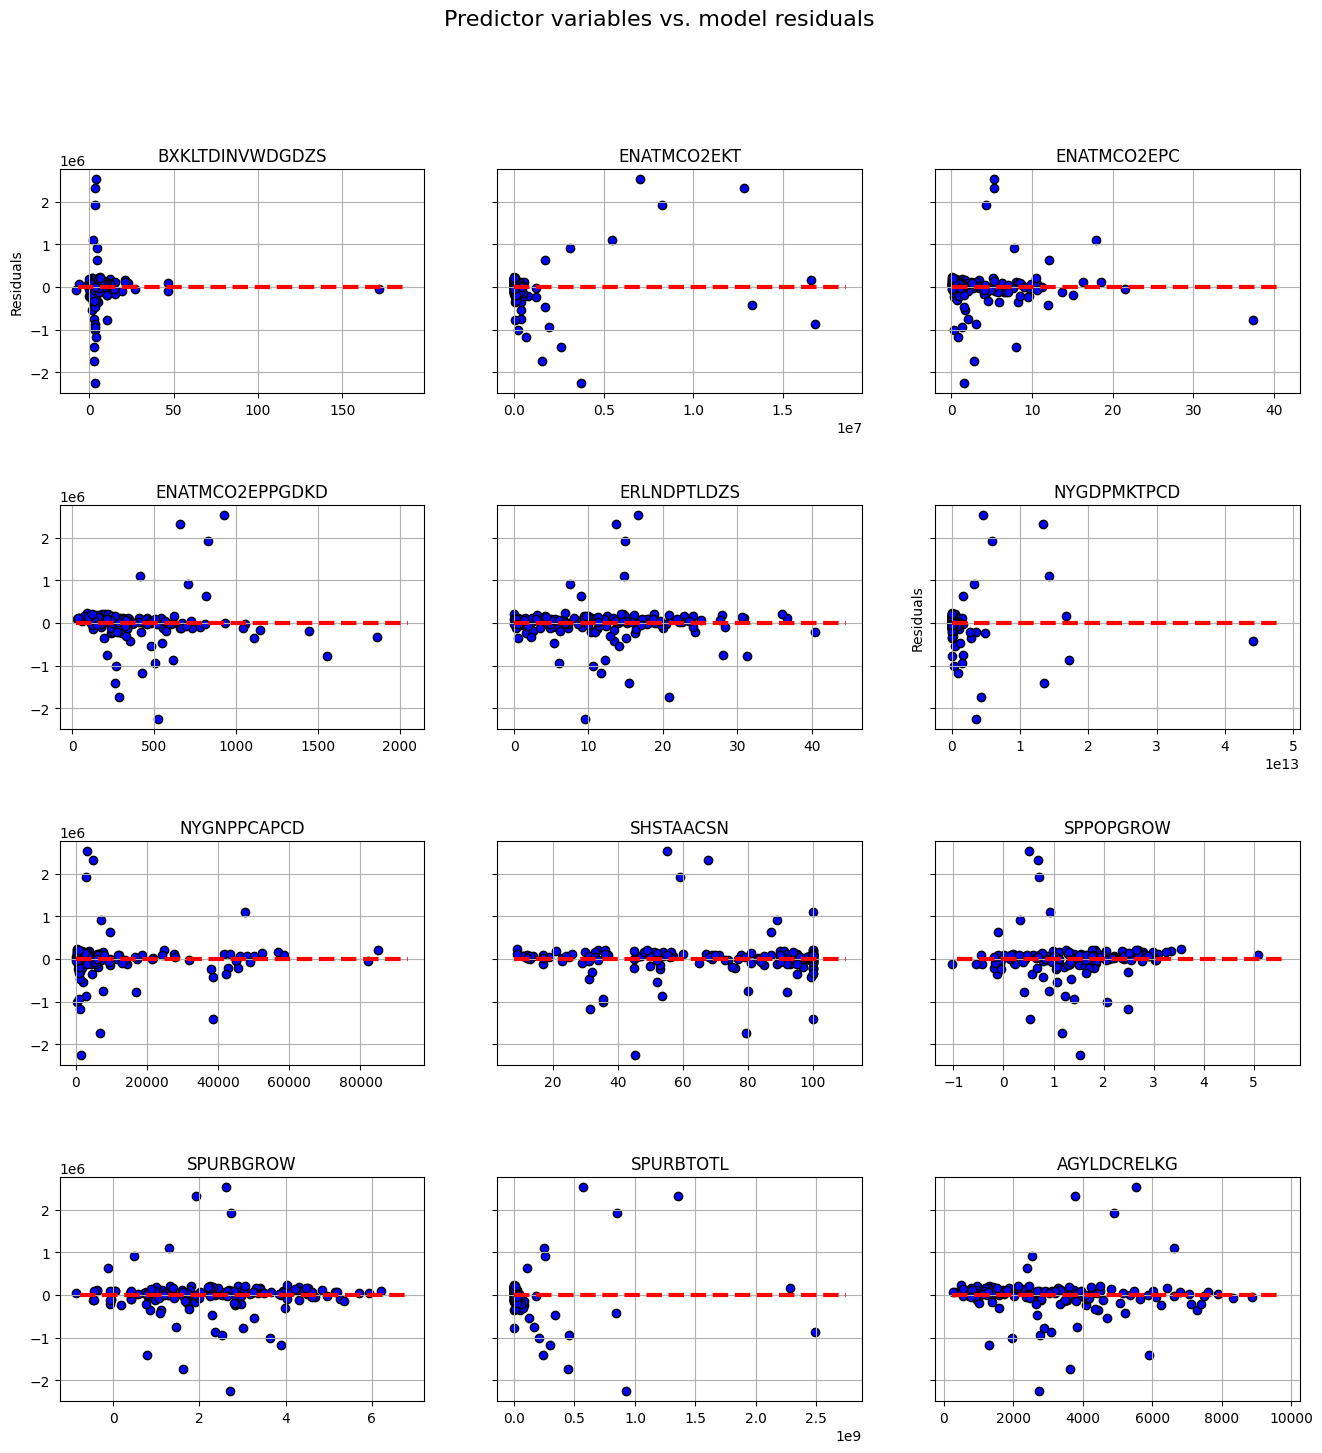

In [466]:
fig, axs = plt.subplots(4,3, figsize=(16,16),sharey=True)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
fig.suptitle('Predictor variables vs. model residuals', fontsize=16)
axs = axs.ravel()

for index, column in enumerate(dfn.columns):
    axs[index-1].set_title("{}".format(column),fontsize=12)
    axs[index-1].scatter(x=dfn[column],y=fitted.resid,color='blue',edgecolor='k')
    axs[index-1].grid(True)
    xmin = min(dfn[column])
    xmax = max(dfn[column])
    axs[index-1].hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    if index == 1 or index == 6:
        axs[index-1].set_ylabel('Residuals')

The residuals appear to be largely randomly distributed apart from distributions observed in series code 'BXKLTDINVWDGDZS' and 'NYGDPMKTPCD'.  

We can conclude that the resuduals are largely independent

### Check for homoscedacity

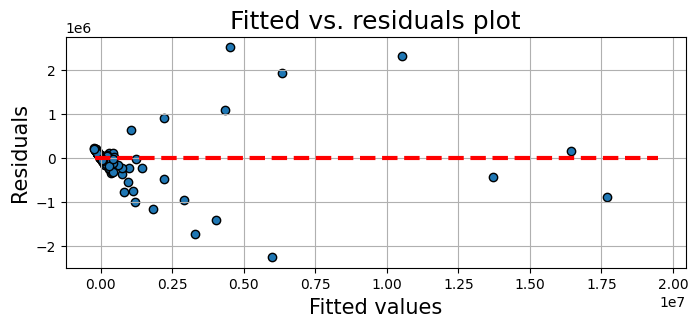

In [467]:
plt.figure(figsize=(8,3))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin = min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

There is a cluster formed around the 0.00 and 0.25 area which shows the presence of homoscedacity. The presence of these outliers means that those values are weighted too heavily in the prediction process, disproportionately influencing the model's performance. This in turn can lead to the confidence interval for out of sample predictions (unseen data) being unrealistically wide or narrow.

### Test for normality

In [93]:
# We once again use the statsmodel library to assist us in producing our qqplot visualisation. 
from statsmodels.graphics.gofplots import qqplot

<Figure size 800x500 with 0 Axes>

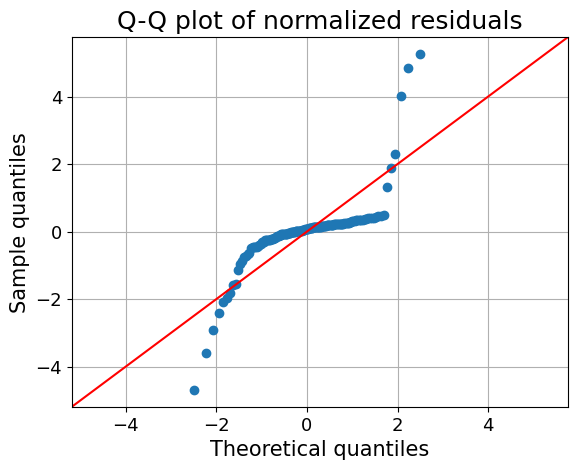

In [468]:
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

The Q-Q plot will show if the residuals are normally distributed if the points cluster around the line. This condition appeears to be met to a large extent

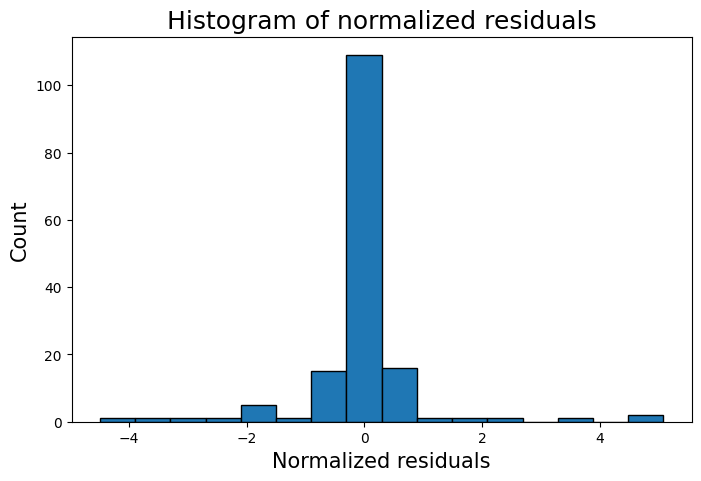

In [337]:
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=16,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

 The residuals have a characteristic distribution of a bell curve to signify normality.
 
 There appears to be evidence of normality observed with the residuals based on the two plots

### Other models

#### Implementing multiple linear regression in Sklearn

In [45]:
#split into train and test dataframe 
df_train= dfn[:126]
df_test= dfn[126:]

In [46]:
df_train.columns

Index(['AGYLDCRELKG', 'BXKLTDINVWDGDZS', 'ENATMCO2EKT', 'ENATMCO2EPC',
       'ENATMCO2EPPGDKD', 'ERLNDPTLDZS', 'NYGDPMKTPCD', 'NYGNPPCAPCD',
       'SHSTAACSN', 'SPPOPGROW', 'SPURBGROW', 'SPURBTOTL'],
      dtype='object')

In [327]:
y= df_train['ENATMCO2EKT']
X= df_train.drop('ENATMCO2EKT', axis=1)

In [267]:
# #data for app
# dfnew=dfn.drop(['ENATMCO2EPC', 'ENATMCO2EPPGDKD'], axis=1)
# dfnew.to_csv('new data.csv')

We will be trying our different scaling methods including standard scaler, mim mx scaler and quantile scaler

### Using standard scaler

In [94]:
#scaling the dataset using standard scalar

# Import the scaling module
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
# Create standardization object
scaler = StandardScaler()

In [328]:
#save standardized scale into new variable
x_scaled= scaler.fit_transform(X)

In [329]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(x_scaled, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [323]:
#Build the linear regression model
lm=LinearRegression()

In [330]:
lm.fit(X_train, y_train)

LinearRegression()

In [477]:
#check the performane
from sklearn import metrics
import math

In [332]:
#generate predictions
lm_pred =lm.predict(X_train)

In [333]:
metrics.r2_score(y_train, lm_pred)

0.9711504701626712

The linear regression model has an accuracy acore of 97% which is a very good result. we will go ahead to generate accuracy score for test data to find out if our model is able to generalize to unseen dataset.

In [334]:
lm_pred_test= lm.predict(X_test)

In [335]:
metrics.r2_score(y_test, lm_pred_test)

0.8221468971777541

The accuracy of the test data is also very high giving an 82% accurate predictions on unseen data.

In [336]:
#check other metrics
#RMSE
print(math.sqrt(metrics.mean_squared_error(y_train, lm_pred)))
print(math.sqrt(metrics.mean_squared_error(y_test, lm_pred_test)))

486431.14916682825
290535.87702025694


The other metrics measures have high values, this is expected since the values of our imput data is normally high

#### Using other preprocessing technique for normalization

In [337]:
from sklearn.preprocessing import MinMaxScaler

In [338]:
Scaler_min= MinMaxScaler()

In [339]:
x_scaled_min = Scaler_min.fit_transform(X)
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_scaled_min, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [340]:
lm_min= LinearRegression()
lm_min.fit(X_train1, y_train1)

LinearRegression()

In [341]:
lm_min_pred= lm_min.predict(X_train1)

In [342]:
metrics.r2_score(y_train1, lm_min_pred)

0.9711504701626712

In [343]:
lm_min_test_pred= lm_min.predict(X_test1)
metrics.r2_score(y_test1, lm_min_test_pred)

0.8221468971777521

We obserse that there are no differences between the performance of the Min max scaler and standard scaler on the dataset

NOn linear preprocessing and normalization

In [344]:
from sklearn.preprocessing import PowerTransformer

In [350]:
Scaler_quant= PowerTransformer(method="yeo-johnson")
x_scaled_quant = Scaler_quant.fit_transform(X)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_scaled_quant, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [351]:
lm_quant= LinearRegression()
lm_quant.fit(X_train2, y_train2)

LinearRegression()

In [352]:
lm_quant_pred= lm_quant.predict(X_train2)
metrics.r2_score(y_train2, lm_quant_pred)

0.3621386029565721

In [353]:
lm_quant_test_pred= lm_quant.predict(X_test2)
metrics.r2_score(y_test2, lm_quant_test_pred)

-0.4785042489946014

The MimMaxSxaler and the StandardScaler performed best for scaling our data producing similar result for the acuracy score. The non-linear transformer perfomed worse 

#### Generating predictions and feauture weights

In [354]:
# extract model coeffs
weights = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [355]:
#sort weights in order decreasing importance ignoring the negativesigns
weights.reindex(weights.Coefficient.abs().sort_values(ascending= False).index)

,Coefficient
SPURBTOTL,1.809904e+06
NYGDPMKTPCD,8.962082e+05
SPURBGROW,2.350217e+05
SPPOPGROW,-1.696696e+05
ENATMCO2EPPGDKD,1.412789e+05
ENATMCO2EPC,8.035844e+04
AGYLDCRELKG,6.318076e+04
SHSTAACSN,-4.067312e+04
NYGNPPCAPCD,-3.322195e+04
ERLNDPTLDZS,2.339245e+04


In [357]:
#generate predictions using the linear model
df_train_lm= df_train.drop('ENATMCO2EKT', axis=1)
lm_new= LinearRegression()
lm_new.fit(df_train_lm, df_train['ENATMCO2EKT'])
preds_test= lm_new.predict(df_test.drop('ENATMCO2EKT', axis=1))

In [359]:
preds_lm= pd.DataFrame()
preds_lm.index=df_test.index
preds_lm['predicted emission']= preds_test
preds_lm['Co2 emission']= df_test['ENATMCO2EKT']
preds_lm.head(10)

,predicted emission,Co2 emission
Country_code,,
SLV,-2.066242e+05,6112.889000
SRB,2.330844e+05,49933.539000
SSA,1.846929e+06,684558.623764
SUR,1.517560e+05,2438.555000
SVK,5.953693e+03,37557.414000
SVN,-1.179589e+05,17157.893000
SWE,-2.226708e+05,49049.792000
SWZ,-1.411977e+05,1092.766000
SYR,1.630634e+05,71598.175000


The predictions appears to be accurate considering what the original data is. We however notice some instances of negative predicitons, this is because of the model used. We will be correcting for this later using a transformation method, but now we are more interested in finding features that are important to CO2 predcitions.

### Feauture selection with LASSO

In [360]:
# Import LASSO module
from sklearn.linear_model import Lasso

In [361]:
# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=20000)

In [362]:
# Train the LASSO model
lasso.fit(X_train, y_train)

Lasso(alpha=20000)

In [363]:
#check Lasso accuracy
Lasso_pred= lasso.predict(X_train)
metrics.r2_score(y_train, Lasso_pred)

0.9699944763826549

In [364]:
Lasso_test_pred= lasso.predict(X_test)
metrics.r2_score(y_test, Lasso_test_pred)

0.8457877732297339

In [365]:
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])
#sort the coefficient
coeff.reindex(coeff.Coefficient.abs().sort_values(ascending= False).index)

,Coefficient
SPURBTOTL,1.817503e+06
NYGDPMKTPCD,8.865042e+05
ENATMCO2EPPGDKD,1.314145e+05
SPURBGROW,7.352055e+04
AGYLDCRELKG,3.932962e+04
SPPOPGROW,-2.623806e+04
ENATMCO2EPC,5.112055e+02
BXKLTDINVWDGDZS,0.000000e+00
ERLNDPTLDZS,0.000000e+00
NYGNPPCAPCD,-0.000000e+00


### Non-Linear model

Random Forest

In [158]:
from sklearn.ensemble import RandomForestRegressor

In [366]:
# Create a random forest model
RF = RandomForestRegressor()

In [367]:
#get best params with gridsearch
from sklearn.model_selection import GridSearchCV

gs_rf = GridSearchCV(RF,
                  param_grid = {'max_depth': range(1, 11),
                                'n_estimators': range(1,20,5),
                                'min_samples_split': range(10, 30, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs_rf.fit(X_train, y_train)

print(gs_rf.best_params_)
print(-gs_rf.best_score_)

{'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 6}
1179721688637.3486


In [377]:
# Our forest consists of 20 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators= 6, max_depth=3)
RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=6)

In [378]:
# get train predictions
train_RF= RF.predict(X_train)
# get test predictions
test_RF= RF.predict(X_test)

In [379]:
#get metrics
print(metrics.r2_score(y_train, train_RF)) #multioutput='variance_weighted')
print(metrics.r2_score(y_test, test_RF))

0.9600067694041441
0.5829581923354581


### Get dataframe of metrics

In [380]:
# Dictionary of results
results_dict3 = {'Training MSE':
                    {
                        "Linear Reg": metrics.mean_squared_error(y_train, lm_pred),
                        "Linear_min_max": metrics.mean_squared_error(y_train1, lm_min_pred),
                        "LASSO": metrics.mean_squared_error(y_train, Lasso_pred),
                        "Linear_quantile_transformer": metrics.mean_squared_error(y_train2, lm_quant_pred),
                        "Random Forest": metrics.mean_squared_error(y_train, train_RF)
                    },
                    'Test MSE':
                    {
                        "Linear Reg": metrics.mean_squared_error(y_test, lm_pred_test),
                        "Linear_min_max": metrics.mean_squared_error(y_test1, lm_min_test_pred),
                        "LASSO": metrics.mean_squared_error(y_test, Lasso_test_pred),
                        "Linear_quantile_transformer": metrics.mean_squared_error(y_test2, lm_quant_test_pred),
                        "Random Forest": metrics.mean_squared_error(y_test, test_RF)
                    },
                 
                 'R SQUARED Training':
                     {
                         'Linear Reg': metrics.r2_score(y_train, lm_pred),
                         "Linear_min_max": metrics.r2_score(y_train1, lm_min_pred),
                         "LASSO": metrics.r2_score(y_train, Lasso_pred), #multioutput='variance_weighted' ),
                         "Linear_quantile_transformer": metrics.r2_score(y_train2, lm_quant_pred),
                         "Random Forest": metrics.r2_score(y_train, train_RF) # multioutput='variance_weighted')
                     },
                 
                'R SQUARED Test':
                     {
                         'Linear Reg': metrics.r2_score(y_test, lm_pred_test),
                         "Linear_min_max": metrics.r2_score(y_test1, lm_min_test_pred),
                         "LASSO": metrics.r2_score(y_test, Lasso_test_pred),
                         "Linear_quantile_transformer": metrics.r2_score(y_test2, lm_quant_test_pred),
                         "Random Forest": metrics.r2_score(y_test, test_RF)
                     }
                }

In [381]:
# create dataframe from dictionary
metrics_3 = pd.DataFrame(data=results_dict3)
metrics_3

,Training MSE,Test MSE,R SQUARED Training,R SQUARED Test
Linear Reg,2.366153e+11,8.441110e+10,0.971150,0.822147
Linear_min_max,2.366153e+11,8.441110e+10,0.971150,0.822147
LASSO,2.460964e+11,7.319087e+10,0.969994,0.845788
Linear_quantile_transformer,5.231549e+12,7.017149e+11,0.362139,-0.478504
Random Forest,3.280126e+11,1.979328e+11,0.960007,0.582958


The linear models happen to be the best performming, standardizing the linear model helped increased the accuaracy as standardiziong was able to correct for the residuals not following normal distribution. The Lasso, appears to be the best performning model with best test accuracy and least gap between Training and Test MSE. We therefore use the Lasso model to generate important features and interprete coefficient

#### Interpretation of coefficient

In [505]:
used_series

,Series_name,Series_code
6,Nationally terrestrial protected areas (% of t...,ERLNDPTLDZS
14,GDP ($),NYGDPMKTPCD
15,GNI per capita (Atlas $),NYGNPPCAPCD
23,Access to improved sanitation (% of total pop.),SHSTAACSN
31,Cereal yield (kg per hectare),AGYLDCRELKG
32,"Foreign direct investment, net inflows (% of GDP)",BXKLTDINVWDGDZS
36,"CO2 emissions, total (KtCO2)",ENATMCO2EKT
37,CO2 emissions per capita (metric tons),ENATMCO2EPC
38,"CO2 emissions per units of GDP (kg/$1,000 of 2...",ENATMCO2EPPGDKD
55,Urban population,SPURBTOTL


In [382]:
df_details= used_series.copy()

In [383]:
df_details.drop(36, inplace= True)

In [384]:
df_details.sort_values(by= 'Series_code', inplace= True)

In [385]:
df_details.index= coeff.index

In [510]:
result_coeff= pd.DataFrame()
result_coeff['Series_name']= df_details['Series_name']
result_coeff['Coefficient']= coeff['Coefficient']
result_coeff

,Series_name,Coefficient
AGYLDCRELKG,Cereal yield (kg per hectare),3.932962e+04
BXKLTDINVWDGDZS,"Foreign direct investment, net inflows (% of GDP)",0.000000e+00
ENATMCO2EPC,CO2 emissions per capita (metric tons),5.112055e+02
ENATMCO2EPPGDKD,"CO2 emissions per units of GDP (kg/$1,000 of 2...",1.314145e+05
ERLNDPTLDZS,Nationally terrestrial protected areas (% of t...,0.000000e+00
NYGDPMKTPCD,GDP ($),8.865042e+05
NYGNPPCAPCD,GNI per capita (Atlas $),-0.000000e+00
SHSTAACSN,Access to improved sanitation (% of total pop.),-0.000000e+00
SPPOPGROW,Population growth (annual %),-2.623806e+04
SPURBGROW,Urban population growth (annual %),7.352055e+04


In [511]:
#sort coeffiecient table by weights
#sort weights in order decreasing importance ignoring the negativesigns
result_coeff.reindex(result_coeff.Coefficient.abs().sort_values(ascending= False).index)

,Series_name,Coefficient
SPURBTOTL,Urban population,1.817503e+06
NYGDPMKTPCD,GDP ($),8.865042e+05
ENATMCO2EPPGDKD,"CO2 emissions per units of GDP (kg/$1,000 of 2...",1.314145e+05
SPURBGROW,Urban population growth (annual %),7.352055e+04
AGYLDCRELKG,Cereal yield (kg per hectare),3.932962e+04
SPPOPGROW,Population growth (annual %),-2.623806e+04
ENATMCO2EPC,CO2 emissions per capita (metric tons),5.112055e+02
BXKLTDINVWDGDZS,"Foreign direct investment, net inflows (% of GDP)",0.000000e+00
ERLNDPTLDZS,Nationally terrestrial protected areas (% of t...,0.000000e+00
NYGNPPCAPCD,GNI per capita (Atlas $),-0.000000e+00


The result shows the contribution of each feature to the target variable which is total co2 emmission. With Lasso shrinking feautures like Foreign direct investment net inflows(% of GDP), Nationallt terrestrial protected area, GNI per capita and Access to improved water source, there are seven important features to consider in in order of contribution to CO2 emission. It can be observed from the table that Urban population has the highest contribution to CO2 Emmision as an increase of 1,817,505 in urban population will yield a 1 unit increase in rate of CO2 Emmision. GDP in the second place as an 886,500.90 dollars increase in GDP, yields a unit increase in CO2 Emmision. Urban population growth also have a positive impact on CO2 Emmission with an increase of 73,570.93 in annual urban population growth yielding a 1 unit increase in CO2 Emmission. While Urban population growth shows a positive trend with CO2 Emmission, population growth (annual) shows a negative trend with CO2 Emmision. Since population growth is averaged accross the whole country both in rural and urban areas, it is possible that increase in rural/ farming population equals out and exceed that of urban population in some countries thereby affecting the trend of CO2 emmission as observed. Cereal yield in kg per hectare also have a positive impact on CO2 emmision as a yield of 648,006.00 units per hectare gives rise to a 1 unit increase in CO2 Emmission. This indicates that, countries with high cereal yield tends to experience more CO2 Emmission. A research by Chunchun et al, (2022) reported a relationship between the presence of farm carbon footprints (CFs) and nitrogen footprints (NFs) and the farming of rice, wheat and maize production in China with Synthetic nitrogen fertilizer applications and methane (CH4) emissions being the dominant CF sources, while ammonia (NH3) volatilization was the main NF contributor.Similarly, Kumar et al found out that the management practices involving land preparation, sowing, fertilizer application, irrigation, pest management, etc. significantly influence the emission of carbon dioxide (CO2) and nitrous oxide (N2O) from agricultural soil. In the study, CO2 and N2O emission were assessed from maize and wheat crops at four different levels of N fertilizer. The study found out that Emissions of CO2 per hectare varied from 331.4 to 1,088.3 kgCO2 in maize and ranged from 292.3 to 765.3 kgCO2 in wheat on application of different doses of N. In summary the top performing features are urban population, GDP, urban population growth, cereal yield and population. CO2 emissions per units of GDP and CO2 emissions per capita (metric tons) both also have positive impact on total CO2 emmission as countries with higher values tend to have higher total CO2 emission as it would be expected. Foreign direct investment, net inflows (% of GDP) and Nationally terrestrial protected areas (% of total land area) also have a positve trend with CO2 emission. It is although expected that the more the protected area a country has, the less the CO2 emission should be, the positive impact observed is an interesting anomally that could be studied further. The Gross National Income (GNI per capita) also shows a negative trend with CO2 emission. It should also be noted that access to improved sanitation have a negative impact on CO2 emmission indicating that, countries with imporved access to sanitation, tend to have lower values of Emmission even though the particular feature has been shrinked by Lasso in order of importance and contribution to the target variable.

### Predicting CO2 Emission

Before we be go on to generating predictions, we will be log transforming target variable to avoid getting negative predictions as observed with lm predictions ealier and help reduce the impact of having outliers in the target variable.

We will also drop two other feeatures (CO2 emissions per capita (metric tons) and CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)). These features are also a measure of co2 emission and it makes sense to drop them because a person tryin to predict co2 emission might not have the values of the other measures.

In [288]:
#define varialbes and log tranform target variable
list6= ['ENATMCO2EPC', 'ENATMCO2EPPGDKD', 'ENATMCO2EKT'] #droppin two other features that measures co2 emission
yp= np.log10(df_train['ENATMCO2EKT'])
Xp= df_train.drop(list6, axis=1)

In [289]:
#
# split into train and test
X_train3, X_test3, y_train3, y_test3 = train_test_split(Xp, 
                                                    yp, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [290]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2, include_bias= False, interaction_only= False)
xp_train = polynomial_features.fit_transform(X_train3)
xp_test= polynomial_features.transform(X_test3)
xp_train.shape

(100, 54)

In [292]:
cols_poly=polynomial_features.get_feature_names_out(X_train3.columns)
df_poly = pd.DataFrame(xp_train, columns=cols_poly)
df_poly.head(3)

,AGYLDCRELKG,BXKLTDINVWDGDZS,ERLNDPTLDZS,NYGDPMKTPCD,NYGNPPCAPCD,SHSTAACSN,SPPOPGROW,SPURBGROW,SPURBTOTL,AGYLDCRELKG^2,...,SHSTAACSN^2,SHSTAACSN SPPOPGROW,SHSTAACSN SPURBGROW,SHSTAACSN SPURBTOTL,SPPOPGROW^2,SPPOPGROW SPURBGROW,SPPOPGROW SPURBTOTL,SPURBGROW^2,SPURBGROW SPURBTOTL,SPURBTOTL^2
0,4694.2,1.826336,14.111434,5.102267e+11,1950.0,52.0,1.065196,3.265678,1.209059e+08,22035513.64,...,2704.0,55.390187,169.815236,6.287105e+09,1.134642,3.478586,1.287884e+08,10.664650,3.948396e+08,1.461823e+16
1,1553.4,46.828803,18.141897,8.425073e+08,180.0,17.0,5.081578,6.218714,2.200198e+06,2413051.56,...,289.0,86.386833,105.718145,3.740336e+07,25.822439,31.600885,1.118048e+07,38.672409,1.368240e+07,4.840871e+12
2,2016.4,3.072459,18.206396,1.667502e+10,1490.0,25.0,1.624282,2.328187,6.307790e+06,4065868.96,...,625.0,40.607040,58.204664,1.576948e+08,2.638291,3.781631,1.024563e+07,5.420453,1.468571e+07,3.978821e+13


#### Fit Linear model

In [300]:
#define a linear regression object
lm_p= LinearRegression()

In [301]:
#fit kinear regression module on the data
lm_p.fit(xp_train, y_train3)

LinearRegression()

In [302]:
#test performance
lm_pred_p= lm_p.predict(xp_train)
lm_p_pred_test= lm_p.predict(xp_test)

In [304]:
print(metrics.r2_score(y_train3, lm_pred_p))
print(metrics.r2_score(y_test3, lm_p_pred_test))

0.5787320873669177
0.2754889958455693


In [ ]:
# Extract coefficient from model
coeff_p = pd.DataFrame(lm_p.coef_, df_poly.columns, columns=['Coefficient'])
coeff_p

#### Fit Lasso model

In [305]:
# Create LASSO model object, setting alpha to 0.01
lasso_p = Lasso(alpha= 0.01)

In [306]:
# Train the LASSO model
lasso_p.fit(xp_train, y_train3)

C:\Users\Layo\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e+01, tolerance: 1.444e-02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [307]:
#check Lasso accuracy
Lasso_p_pred= lasso_p.predict(xp_train)
metrics.r2_score(y_train3, Lasso_p_pred)

0.8681349686569192

In [308]:
Lassop_test_pred= lasso_p.predict(xp_test)
metrics.r2_score(y_test3, Lassop_test_pred)

0.4840580078164948

#### Fit Random forest model

In [309]:
# Create a random forest model
RF_p= RandomForestRegressor()

In [310]:
#get best params with gridsearch
from sklearn.model_selection import GridSearchCV

gs_rf = GridSearchCV(RF_p,
                  param_grid = {'max_depth': range(1, 11),
                                'n_estimators': range(1,20,5),
                                'min_samples_split': range(10, 30, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs_rf.fit(xp_train, y_train3)

print(gs_rf.best_params_)
print(-gs_rf.best_score_)

{'max_depth': 9, 'min_samples_split': 10, 'n_estimators': 6}
0.10381936078344642


In [311]:
# Our forest consists of 20 trees with a max depth of 5 in this example
RF_p = RandomForestRegressor(n_estimators= 16, max_depth=10)
RF_p.fit(xp_train, y_train3)

RandomForestRegressor(max_depth=10, n_estimators=16)

In [314]:
# get train predictions
train_RFp= RF.predict(xp_train)
# get test predictions
test_RFp= RF.predict(xp_test)

In [315]:
#get metrics
print(metrics.r2_score(y_train3, train_RF)) #multioutput='variance_weighted')
print(metrics.r2_score(y_test3, test_RF))

0.9911224947956769
0.9396359695035316


The random forest model is the best performing model as seen in the accuracy score

In [316]:
# Dictionary of metrics results
results_dict4 = {'Training MSE':
                    {
                        "Linear Reg": metrics.mean_squared_error(y_train3, lm_pred_p),
                        "LASSO": metrics.mean_squared_error(y_train3, Lasso_p_pred),
                        "Random Forest": metrics.mean_squared_error(y_train3, train_RFp)
                    },
                    'Test MSE':
                    {
                        "Linear Reg": metrics.mean_squared_error(y_test3, lm_p_pred_test),
                        "LASSO": metrics.mean_squared_error(y_test3, Lassop_test_pred),
                        "Random Forest": metrics.mean_squared_error(y_test3, test_RFp)
                    },
                 
                 'R SQUARED Training':
                     {
                         'Linear Reg': metrics.r2_score(y_train3, lm_pred_p),
                         "LASSO": metrics.r2_score(y_train3, Lasso_p_pred), #multioutput='variance_weighted' ),
                         "Random Forest": metrics.r2_score(y_train3, train_RFp) # multioutput='variance_weighted')
                     },
                 
                'R SQUARED Test':
                     {
                         'Linear Reg': metrics.r2_score(y_test3, lm_p_pred_test),
                         "LASSO": metrics.r2_score(y_test3, Lassop_test_pred),
                         "Random Forest": metrics.r2_score(y_test3, test_RFp)
                     }
                }

In [317]:
# create dataframe from dictionary
metrics_4 = pd.DataFrame(data=results_dict4)
metrics_4

,Training MSE,Test MSE,R SQUARED Training,R SQUARED Test
Linear Reg,0.608350,0.862596,0.578732,0.275489
LASSO,0.190425,0.614276,0.868135,0.484058
Random Forest,0.012820,0.071869,0.991122,0.939636


### Generatin predictions 

In [318]:
X_df_test=df_test.drop(list6, axis=1)
xp_dftest= polynomial_features.transform(X_df_test)
xp_dftest.shape

(30, 54)

In [319]:
preds_test1= RF_p.predict(xp_dftest)

In [386]:
preds_rf= pd.DataFrame()
preds_rf.index=df_test.index
preds_rf['predicted emission']= 10**preds_test1
preds_rf['Co2 emission']= df_test['ENATMCO2EKT']
preds_rf

,predicted emission,Co2 emission
Country_code,,
SLV,1.106405e+04,6.112889e+03
SRB,3.850497e+04,4.993354e+04
SSA,1.253604e+06,6.845586e+05
SUR,1.891982e+03,2.438555e+03
SVK,4.736802e+04,3.755741e+04
SVN,2.806815e+04,1.715789e+04
SWE,7.159455e+04,4.904979e+04
SWZ,8.112164e+02,1.092766e+03
SYR,2.437028e+04,7.159818e+04


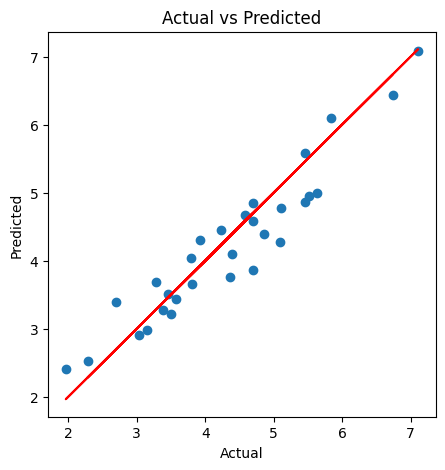

In [387]:
# compare prediction with actual 
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(np.log10(preds_rf['Co2 emission']), np.log10(preds_rf['predicted emission']))
ax.plot(np.log10(preds_rf['Co2 emission']), np.log10(preds_rf['Co2 emission']),'r')
plt.show()

The plot shows that the model was able to predict the target variable to a very high level of accuracy with the predicted values being close to the actual values.